<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2021_JNJ_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-30 11:10:40--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.188.113, 64.233.188.102, 64.233.188.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c30pemci9b4gcgtamnb137koms2i2sen/1672398600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=dfe15f06-2efa-442a-aa2b-e8fb55345cb8 [following]
--2022-12-30 11:10:43--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c30pemci9b4gcgtamnb137koms2i2sen/1672398600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=dfe15f06-2efa-442a-aa2b-e8fb55345cb8
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to doc-0k

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/畢專/JNJ_2021_Q4_20210125發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.0,proper noun,root,True,False,False,False
1,&,0.0,0.0,coordinating conjunction,coordinating conjunction,False,False,True,False
2,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
3,(,0.0,0.0,punctuation,punctuation,False,False,True,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13713,You,0.0,0.0,pronoun,nominal subject,True,True,False,False
13714,may,0.0,0.0,auxiliary,auxiliary,True,True,False,False
13715,now,0.0,0.0,adverb,adverbial modifier,True,True,False,False
13716,disconnect,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13718 entries, 0 to 13717
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          13718 non-null  object 
 1   Polarity      13718 non-null  float64
 2   Subjectivity  13718 non-null  float64
 3   Pos_          13718 non-null  object 
 4   Dep_          13714 non-null  object 
 5   Alpha         13718 non-null  bool   
 6   Stopword      13718 non-null  bool   
 7   Punct         13718 non-null  bool   
 8   Num           13718 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 589.6+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.0,proper noun,root,True,False,False,False
2,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
4,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
6,JNJ,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
10,Earnings,0.0,0.0,proper noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13704,Johnson,0.0,0.0,proper noun,conjunct,True,False,False,False
13707,Quarter,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
13709,Earnings,0.0,0.0,proper noun,compound,True,False,False,False
13710,Conference,0.0,0.0,proper noun,compound,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
80,morning,0.0,0.0,noun,appositional modifier,True,False,False,False
82,Welcome,0.8,0.9,interjection,root,True,False,False,False
96,participants,0.0,0.0,noun,nominal subject,True,False,False,False
100,listen,0.0,0.0,verb,adjectival modifier,True,False,False,False
103,mode,0.0,0.0,noun,object of preposition,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13680,year,0.0,0.0,noun,object of preposition,True,False,False,False
13690,Thank,0.0,0.0,verb,root,True,False,False,False
13699,concludes,0.0,0.0,verb,root,True,False,False,False
13700,today,0.0,0.0,noun,possession modifier,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
82,Welcome,0.8,0.9,interjection,root,True,False,False,False
100,listen,0.0,0.0,verb,adjectival modifier,True,False,False,False
120,recorded,0.0,0.0,verb,root,True,False,False,False
126,objections,0.0,0.0,noun,direct object,True,False,False,False
130,disconnect,0.0,0.0,verb,root,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13673,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
13677,informed,0.0,0.0,verb,object predicate,True,False,False,False
13690,Thank,0.0,0.0,verb,root,True,False,False,False
13699,concludes,0.0,0.0,verb,root,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
82,Welcome,0.800,0.9,interjection,root,True,False,False,False
100,listen,0.000,0.0,verb,adjectival modifier,True,False,False,False
178,Welcome,0.800,0.9,interjection,root,True,False,False,False
198,financial,0.000,0.0,adjective,adjectival modifier,True,False,False,False
244,available,0.400,0.4,adjective,object predicate,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13655,proud,0.800,1.0,adjective,adjectival complement,True,False,False,False
13665,extremely,-0.125,1.0,adverb,adverbial modifier,True,False,False,False
13667,positioned,0.000,0.0,verb,adjectival complement,True,False,False,False
13673,forward,0.000,0.0,adverb,adverbial modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    1304.000000
mean        0.067227
std         0.203021
min        -0.600000
25%         0.000000
50%         0.000000
75%         0.062500
max         1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    1304.000000
mean        0.238679
std         0.312247
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
82,Welcome,0.800,0.9,interjection,root,True,False,False,False,Positive,Subjective
100,listen,0.000,0.0,verb,adjectival modifier,True,False,False,False,Neutral,Objective
178,Welcome,0.800,0.9,interjection,root,True,False,False,False,Positive,Subjective
198,financial,0.000,0.0,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
244,available,0.400,0.4,adjective,object predicate,True,False,False,False,Positive,Subjective
...,...,...,...,...,...,...,...,...,...,...,...
13655,proud,0.800,1.0,adjective,adjectival complement,True,False,False,False,Positive,Subjective
13665,extremely,-0.125,1.0,adverb,adverbial modifier,True,False,False,False,Negative,Subjective
13667,positioned,0.000,0.0,verb,adjectival complement,True,False,False,False,Neutral,Objective
13673,forward,0.000,0.0,adverb,adverbial modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Objective,2
1,Negative,Subjective,121
2,Neutral,Objective,706
3,Neutral,Subjective,145
4,Positive,Subjective,330


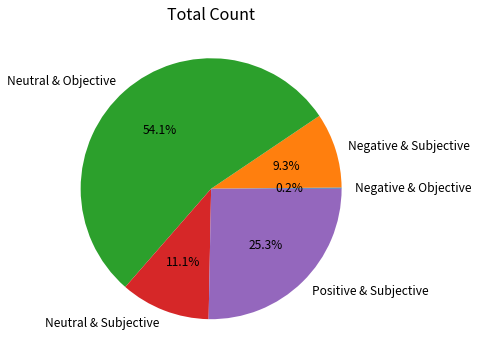

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

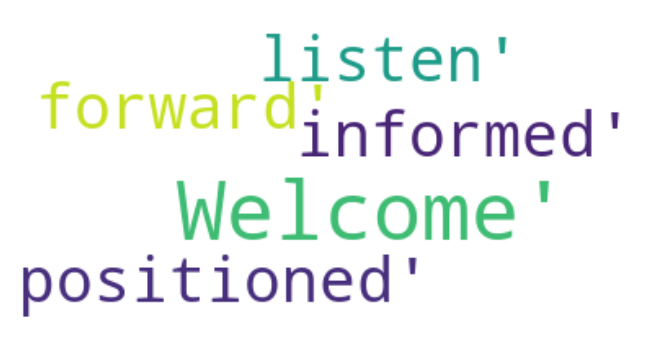

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Johnson & Johnson (NYSE:JNJ) Q4 2021 Earnings ...,0.00,0.00
1,Welcome to Johnson & Johnson's Fourth Quarter ...,0.40,0.45
2,All participants will be in listen-only mode u...,0.00,0.00
3,This call is being recorded.,0.00,0.00
4,"If anyone has any objections, you may disconne...",0.00,0.00
...,...,...,...
535,"And until then, please be well.",0.00,0.00
536,Thank you very much.,0.26,0.26
537,OperatorThank you.,0.00,0.00
538,This concludes today's Johnson & Johnson's Fou...,0.00,0.00


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    540.000000
mean       0.107852
std        0.182965
min       -0.650000
25%        0.000000
50%        0.033712
75%        0.213214
max        0.800000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    540.000000
mean       0.308176
std        0.263743
min        0.000000
25%        0.000000
50%        0.303750
75%        0.500000
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Johnson & Johnson (NYSE:JNJ) Q4 2021 Earnings ...,0.00,0.00,Neutral,Objective
1,Welcome to Johnson & Johnson's Fourth Quarter ...,0.40,0.45,Positive,Subjective
2,All participants will be in listen-only mode u...,0.00,0.00,Neutral,Objective
3,This call is being recorded.,0.00,0.00,Neutral,Objective
4,"If anyone has any objections, you may disconne...",0.00,0.00,Neutral,Objective
...,...,...,...,...,...
535,"And until then, please be well.",0.00,0.00,Neutral,Objective
536,Thank you very much.,0.26,0.26,Positive,Subjective
537,OperatorThank you.,0.00,0.00,Neutral,Objective
538,This concludes today's Johnson & Johnson's Fou...,0.00,0.00,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,66
1,Neutral,Objective,144
2,Neutral,Subjective,49
3,Positive,Objective,1
4,Positive,Subjective,280


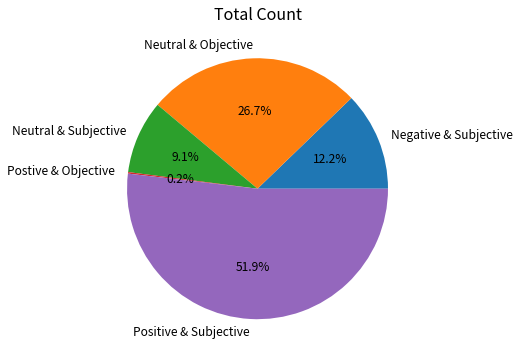

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective","Neutral & Objective", "Neutral & Subjective","Postive & Objective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)A few logistics before we get into the details.

2)Please note that today's presentation includes forward-looking statements regarding, among other things, our future operating and financial performance and the anticipated separation of the company's Consumer Health business.

3)Several of the products and compounds discussed today are being developed in collaboration with strategic partners or licensed from other companies.

4)Operational sales growth, which excludes the effect of translational currency, increased 11.6% as currency had a negative impact of 1.2 points.

5)Operational sales growth outside the U.S. was 21.2%, with currency negatively impacting our reported OUS results by 2.7 points.

6)Excluding the net impact of acquisition and divestitures, adjusted operational sales growth was 12.3% worldwide, 3.1% in the U.S. and 22.4% outside the U.S.I would like to remind everyone that our 2020 fiscal year included additional shipping days, which negatively impacted 2021 fourth q

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)Johnson & Johnson (NYSE:JNJ) Q4 2021 Earnings Conference Call January 25, 2022 8:30 AM ETCompany ParticipantsJessica Moore - Vice President of Investor RelationsJoseph Wolk - Executive Vice President, Chief Financial OfficerJoaquin Duato - Chief Executive OfficerConference Call ParticipantsLouise Chen - Cantor Fitzgerald Larry Biegelsen - Wells Fargo Joshua Jennings - Cowen and CompanyChristopher Schott - JPMorgan Joanne Wuensch - CitigroupMatthew Miksic - Credit Suisse Danielle Antalffy - SVB Leerink Chris Shibutani - Goldman SachsOperatorGood morning.

2)All participants will be in listen-only mode until the question-and-answer session of the conference.

3)This call is being recorded.

4)If anyone has any objections, you may disconnect at this time.

5)[Operator Instructions].

6)I would now like to turn the conference call over to Johnson & Johnson.

7)You may begin.

8)Jessica MooreGood morning.

9)This is Jessica Moore, Vice President of Investor Relations for Johnson & Johnson

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)We anticipate the webcast will last up to 90 minutes.

2)In regions outside the U.S., our reported sales growth was 18.5%.

3)In regions outside the U.S., our reported year-over-year sales growth was 18.2%.

4)Worldwide Consumer Health sales totaled $3.7 billion and grew 1.8%, with growth in the U.S. of 1.3% and 2.1% outside the U.S.

5)Growth in the outpatient surgery channel in the U.S. and market recovery outside the U.S. were additional contributors to growth.

6)As reported earlier, our adjusted earnings per share of $2.13 reflects a reported increase of 14.5% and an operational increase of 17.2%.

7)I encourage you to review our upcoming 2021 10-K for additional details on specific tax matters.

8)The growth is primarily related to COVID-19 recovery realized predominantly in our Medical Devices business.

9)Finally, we submitted a Biologics License Application to the U.S. FDA seeking approval of teclistamab for the treatment of patients with relapsed or refractory multiple myel

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Welcome to Johnson & Johnson's Fourth Quarter 2021 Earnings Conference Call.

2)Welcome to our company's review of business results for the fourth quarter and full year of 2021 and our financial outlook for 2022.

3)This review is being made available via webcast accessible through the Investor Relations section of the Johnson & Johnson website at investor.jnj.com, where you can also find additional materials, including today's presentation and associated schedules.

4)We encourage you to review the cautionary statement included in today's presentation, which identifies certain risks and factors that may cause the company's actual results to differ materially from those projected.

5)In particular, there is significant uncertainty about the duration and contemplated impact of the COVID-19 pandemic and other marketplace dynamics.

6)This means that results could change at any time, and the contemplated impact of COVID-19 on the company's business results and outlook is the best estima

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

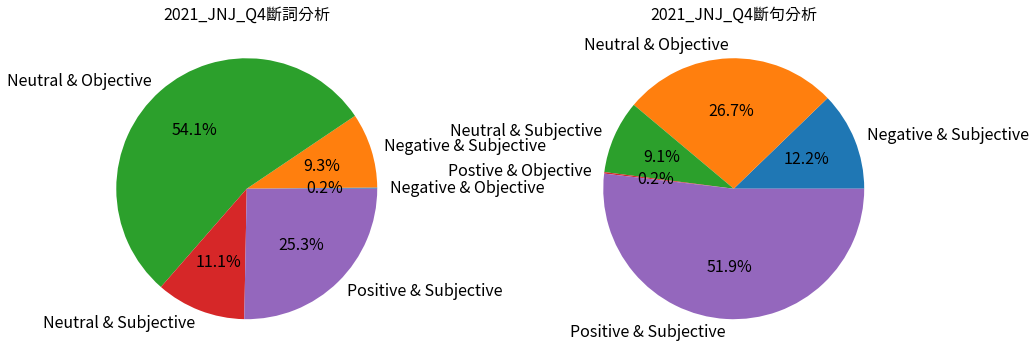

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
label2 = ["Negative & Subjective","Neutral & Objective", "Neutral & Subjective","Postive & Objective","Positive & Subjective"]
axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2021_JNJ_Q4斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2021_JNJ_Q4斷句分析', fontsize=16)


plt.savefig("2021_JNJ_Q4.png")
from google.colab import files
files.download("2021_JNJ_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html


5家公司，4季，2年 =5* 4 * 2=40